---
title: Internal API
category: demonstration
position: 1
---

![](common_files/readdy.png)

This notebook shall demonstrate the usage of the `readdy._internal.api`. Information here is likely to be deprecated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import contextlib as cl

import readdy._internal as api
api.set_logging_level("info")

In [2]:
sim = api.Simulation()
sim.set_kernel("SingleCPU")
sim.box_size = api.Vec(20, 20, 20)
sim.periodic_boundary = [True, True, True]

In [3]:
sim.register_particle_type("A", diffusion_coefficient=1.0, radius=0.5)
sim.register_particle_type("Source A", diffusion_coefficient=1.0, radius=1.0)
sim.register_particle_type("Sink A", diffusion_coefficient=1.0, radius=1.5)

2

In [4]:
sim.register_reaction_fission("create A", from_type="Source A", to_type1="Source A", 
                              to_type2="A", rate=5., product_distance=1.)

sim.register_reaction_fusion("absorb A", from_type1="Sink A", from_type2="A", 
                             to_type="Sink A", rate=15., educt_distance=2.0)

0

In [5]:
sim.add_particle("Source A", api.Vec(0., 0., 0.))
sim.add_particle("Sink A", api.Vec(4., 0., 4.))
sim.add_particle("Sink A", api.Vec(4., 2., 0.))
sim.add_particle("Sink A", api.Vec(-1., -1., -3.))

In [6]:
numbers_data = []
def append_numbers(x):
    global numbers_data
    numbers_data.append(x)
    print("A", x[0])

obs_stride = 500
sim.register_observable_n_particles(stride=obs_stride, types=["A"], callback=append_numbers)

ObservableHandle(id=0)

In [7]:
wanna_look_at_vmd = True
if wanna_look_at_vmd: 
    traj_handle = sim.register_observable_flat_trajectory(stride=1)

In [8]:
time_step = 1e-2
with cl.closing(api.File("out.h5", api.FileAction.CREATE, api.FileFlag.OVERWRITE)) as f:
    if wanna_look_at_vmd:
        traj_handle.enable_write_to_file(f, "traj", 5000)
        
    sim.run_scheme_readdy(True) \
        .write_config_to_file(f) \
        .configure_and_run(20000, time_step)

A 0
A 11
A 25
A 28
A 41
A 37
A 56
A 80
A 89
A 106
A 122
A 134
A 147
A 152
A 164
A 163
A 154
A 157
A 157
A 177
A 189
A 170
A 171
A 152
A 150
A 167
A 176
A 172
A 171
A 182
A 176
A 176
A 173
A 158
A 173
A 163
A 153
A 157
A 149
A 157
A 143


In [9]:
if wanna_look_at_vmd:
    api.convert_xyz("./out.h5", "traj", "./traj.xyz", radii={"A": 1., "Source A": 1., "Sink A": 1.})

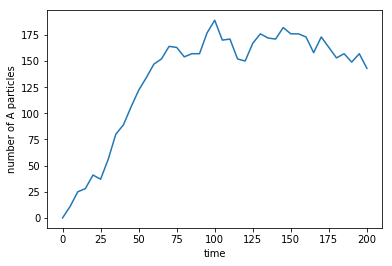

In [10]:
times = np.arange(0., len(numbers_data)) * obs_stride * time_step
plt.plot(times, numbers_data)
plt.xlabel("time")
plt.ylabel("number of A particles")
plt.show()